In [2]:
from greedy import *
from GeneradorDataset import GenerarDatos
import numpy as np
import pandas as pd 
import random, time
import matplotlib.pyplot as plt
import argparse
import scipy.stats as ss
import os
from Metricas import *

In [2]:
file = "./Dataset/Dataset2.csv"
df = pd.read_csv(file, index_col=0)
df.head()

,economia-p,diplomacia-p,estado-p,sociedad-p,genero,economia-i,diplomacia-i,estado-i,sociedad-i
0,0.319739,0.482606,0.527500,0.005568,0.0,0.288500,0.596092,0.356540,0.943266
1,0.373862,0.270195,0.007731,0.087753,0.0,0.386847,0.157833,0.426025,0.683152
2,0.459420,0.462090,0.651313,0.030881,0.0,0.520475,0.060849,0.397577,0.755948
3,0.312633,0.676403,0.264329,0.937833,1.0,0.364138,0.192199,0.318382,0.650455
4,0.221826,0.418016,0.010596,0.718563,1.0,0.125359,0.278250,0.320225,0.928843


In [3]:
g = df.genero.values
g

array([0., 0., 0., ..., 1., 1., 1.])

In [4]:
colores = ["dimgray","silver","lightslategrey"]

In [10]:
index = list(range(len(g)))
random.shuffle(index)

Grupo 0 :  7 4 9
Grupo 1 :  8 2 10
Grupo 2 :  6 5 9
Grupo 3 :  5 5 10
Grupo 4 :  7 1 12
Grupo 5 :  10 3 7
Grupo 6 :  10 4 6
Grupo 7 :  7 5 8
Grupo 8 :  8 8 4
Grupo 9 :  9 3 8


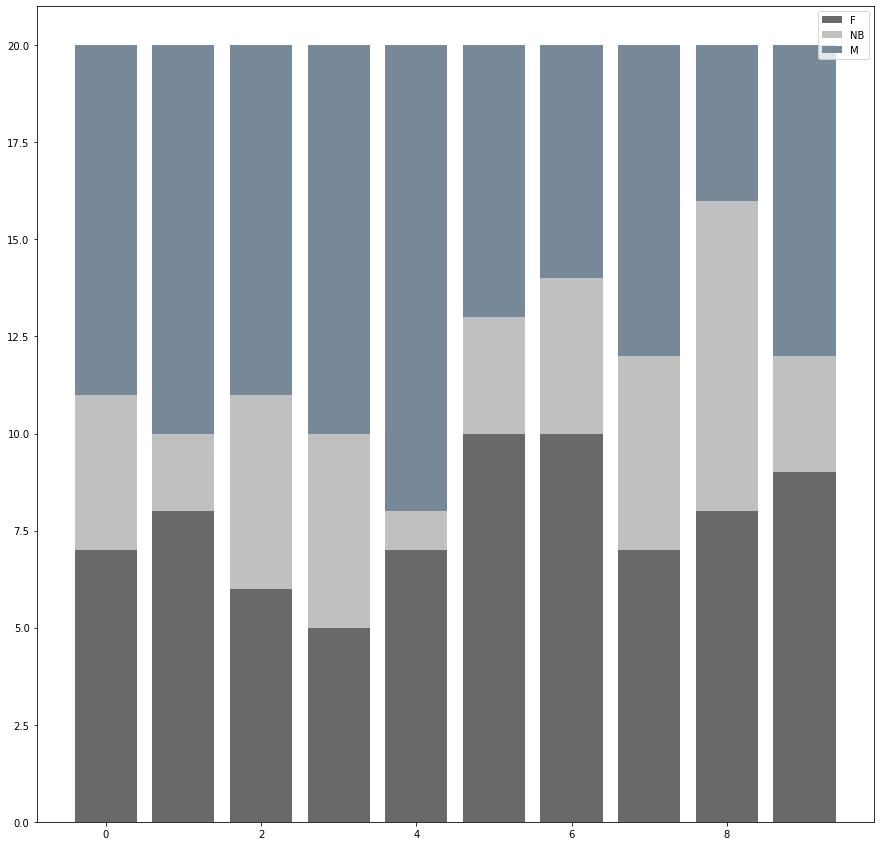

In [20]:
f, axs = plt.subplots( 1, 1, figsize=(15,15) )
i = 0
j = 20
L = 10
fe, nb, m = [], [], []
x = list(range(L))
for l in range(L):
    aux = g[i:j]
    fe.append( (aux == 0).sum() )
    nb.append( (aux == 0.5).sum() )
    m.append( (aux == 1).sum() )
    print("Grupo", l, ": ", fe[-1], nb[-1], m[-1])
    i = j
    j += 20
fe = np.array(fe)
nb = np.array(nb)
m = np.array(m)
axs.bar( x, fe, color=colores[0], label="F" )
axs.bar( x, nb, color=colores[1], bottom=fe, label="NB" )
axs.bar( x, m, color=colores[2], bottom=nb+fe, label="M" )
axs.legend()
plt.show()

---
# Ver resultados

In [6]:
dataset = 1
N = 1000
L = 50
M = 20
df = pd.read_csv( "./Resultados/{}/N={} L={} M={}/resultados.csv".format(dataset, N, L, M), index_col=0 )
df

,Tipo greedy,Cambio promedio,Valor objetivo,Tiempo,Promedio Economía (P),Promedio Diplomacia (P),Promedio Estado (P),Promedio Sociedad (P),Promedio Género,Promedio Economía (IDL),Promedio Diplomacia (IDL),Promedio Estado (IDL),Promedio Sociedad (IDL)
0,normal,0,135.079187,6.504869,0,0,0,0,0,0,0,0,0
1,normal,0,135.079187,6.506784,0,0,0,0,0,0,0,0,0
2,random,0,134.746113,142.556093,0,0,0,0,0,0,0,0,0
3,iterativo,0,134.589282,268.233428,0,0,0,0,0,0,0,0,0


In [7]:
dataset = 2
N = 1000
L = 50
M = 20
df = pd.read_csv( "./Resultados/{}/N={} L={} M={}/resultados.csv".format(dataset, N, L, M), index_col=0 )
df

,Tipo greedy,Cambio promedio,Valor objetivo,Tiempo,Promedio Economía (P),Promedio Diplomacia (P),Promedio Estado (P),Promedio Sociedad (P),Promedio Género,Promedio Economía (IDL),Promedio Diplomacia (IDL),Promedio Estado (IDL),Promedio Sociedad (IDL)
0,iterativo,0,97.445017,190.760934,0,0,0,0,0,0,0,0,0
1,random,0,99.891260,216.813513,0,0,0,0,0,0,0,0,0
2,normal,0,99.696169,10.242105,0,0,0,0,0,0,0,0,0


In [3]:
dataset = 2
N = 1000
L = 50
M = 20
df = pd.read_csv( "./Resultados/{}/N={} L={} M={}/resultados.csv".format(dataset, N, L, M), index_col=0 )
df

,Tipo greedy,Cambio promedio,Valor objetivo,Tiempo,Promedio Economía (P),Promedio Diplomacia (P),Promedio Estado (P),Promedio Sociedad (P),Promedio Género,Promedio Economía (IDL),Promedio Diplomacia (IDL),Promedio Estado (IDL),Promedio Sociedad (IDL)
0,iterativo,0,97.445017,190.760934,0,0,0,0,0,0,0,0,0
1,random,0,99.891260,216.813513,0,0,0,0,0,0,0,0,0
2,normal,0,99.696169,10.242105,0,0,0,0,0,0,0,0,0
3,normal,-1,119.748951,14.125579,0,0,0,0,0,0,0,0,0
4,random,-1,118.567638,336.701776,0,0,0,0,0,0,0,0,0
5,iterativo,-1,118.317620,303.797683,0,0,0,0,0,0,0,0,0


In [2]:
file = "Resultados.xlsx"
df = pd.read_excel(file,sheet_name=0, index_col=0)

In [3]:
df.head()

,N,M,L,Dataset,MinMax,Exp,Politcia,Genero,Colaborativo,Valor Objetivo,Tiempo (s),Solucion
0,4,2,2,2,False,1,1.097694,1.000000,0.571178,2.668872,0.003988,"(0, 3, 1, 2)"
1,6,2,3,2,False,1,1.376865,0.000000,0.713876,2.090742,0.012850,"(1, 5, 2, 3, 0, 4)"
2,6,3,2,2,False,1,0.885043,0.666667,0.542582,2.094292,0.007998,"(0, 4, 5, 1, 2, 3)"
3,8,2,4,2,False,1,1.993285,1.500000,1.023857,4.517141,0.336003,"(0, 4, 1, 5, 2, 3, 6, 7)"
4,8,4,2,2,False,1,0.907795,0.500000,0.888944,2.296739,0.231995,"(0, 2, 3, 4, 1, 5, 6, 7)"


In [4]:
df[ df.N == 4 ]

,N,M,L,Dataset,MinMax,Exp,Politcia,Genero,Colaborativo,Valor Objetivo,Tiempo (s),Solucion
0,4,2,2,2,False,1,1.097694,1.000000,0.571178,2.668872,0.003988,"(0, 3, 1, 2)"
7,4,2,2,2,False,2,0.335680,0.250000,0.072354,0.658034,0.004000,"(0, 3, 1, 2)"
14,4,2,2,2,False,3,0.132872,0.062500,0.011898,0.207270,0.004002,"(0, 3, 1, 2)"
21,4,2,2,2,False,4,0.056454,0.015625,0.002152,0.074231,0.004015,"(0, 3, 1, 2)"
28,4,2,2,2,True,1,0.274423,0.500000,0.142794,0.917218,0.008382,"(0, 3, 1, 2)"
35,4,2,2,2,True,2,0.083920,0.125000,0.018088,0.227009,0.007972,"(0, 3, 1, 2)"
42,4,2,2,2,True,3,0.033218,0.031250,0.002975,0.067443,0.003973,"(0, 3, 1, 2)"
49,4,2,2,2,True,4,0.014114,0.007812,0.000538,0.022464,0.004004,"(0, 3, 1, 2)"


In [16]:
datos = [
    [4, 2, 2],
    [6, 2, 3],
    [6, 3, 2],
    [8, 2, 4],
    [8, 4, 2],
    [10, 2, 5],
    [10, 5, 2],
]

#for N, M, L in datos:
aux = df.groupby(by=["N","M","L"])
aux

In [20]:
for i in aux.indices:
    display( aux.get_group(i) )

,N,M,L,Dataset,MinMax,Exp,Politcia,Genero,Colaborativo,Valor Objetivo,Tiempo (s),Solucion
0,4,2,2,2,False,1,1.097694,1.000000,0.571178,2.668872,0.003988,"(0, 3, 1, 2)"
7,4,2,2,2,False,2,0.335680,0.250000,0.072354,0.658034,0.004000,"(0, 3, 1, 2)"
14,4,2,2,2,False,3,0.132872,0.062500,0.011898,0.207270,0.004002,"(0, 3, 1, 2)"
21,4,2,2,2,False,4,0.056454,0.015625,0.002152,0.074231,0.004015,"(0, 3, 1, 2)"
28,4,2,2,2,True,1,0.274423,0.500000,0.142794,0.917218,0.008382,"(0, 3, 1, 2)"
35,4,2,2,2,True,2,0.083920,0.125000,0.018088,0.227009,0.007972,"(0, 3, 1, 2)"
42,4,2,2,2,True,3,0.033218,0.031250,0.002975,0.067443,0.003973,"(0, 3, 1, 2)"
49,4,2,2,2,True,4,0.014114,0.007812,0.000538,0.022464,0.004004,"(0, 3, 1, 2)"


,N,M,L,Dataset,MinMax,Exp,Politcia,Genero,Colaborativo,Valor Objetivo,Tiempo (s),Solucion
1,6,2,3,2,False,1,1.376865,0.0,0.713876,2.090742,0.012850,"(1, 5, 2, 3, 0, 4)"
8,6,2,3,2,False,2,0.249940,0.0,0.062394,0.312334,0.016832,"(0, 4, 1, 5, 2, 3)"
15,6,2,3,2,False,3,0.053310,0.0,0.006814,0.060124,0.011999,"(0, 4, 1, 5, 2, 3)"
22,6,2,3,2,False,4,0.012725,0.0,0.000862,0.013587,0.011973,"(0, 4, 1, 5, 2, 3)"
29,6,2,3,2,True,1,0.344216,0.0,0.178469,0.522685,0.016003,"(1, 5, 2, 3, 0, 4)"
36,6,2,3,2,True,2,0.062485,0.0,0.015598,0.078083,0.015987,"(0, 4, 1, 5, 2, 3)"
43,6,2,3,2,True,3,0.013327,0.0,0.001704,0.015031,0.012521,"(0, 4, 1, 5, 2, 3)"
50,6,2,3,2,True,4,0.003181,0.0,0.000215,0.003397,0.016016,"(0, 4, 1, 5, 2, 3)"


,N,M,L,Dataset,MinMax,Exp,Politcia,Genero,Colaborativo,Valor Objetivo,Tiempo (s),Solucion
2,6,3,2,2,False,1,0.885043,0.666667,0.542582,2.094292,0.007998,"(0, 4, 5, 1, 2, 3)"
9,6,3,2,2,False,2,0.148550,0.111111,0.045370,0.305030,0.015999,"(0, 4, 5, 1, 2, 3)"
16,6,3,2,2,False,3,0.029633,0.018519,0.004478,0.052629,0.011997,"(0, 4, 5, 1, 2, 3)"
23,6,3,2,2,False,4,0.006364,0.003086,0.000496,0.009947,0.012041,"(0, 4, 5, 1, 2, 3)"
30,6,3,2,2,True,1,0.221261,0.333333,0.135646,0.690240,0.015985,"(0, 4, 5, 1, 2, 3)"
37,6,3,2,2,True,2,0.037137,0.055556,0.011342,0.104035,0.012023,"(0, 4, 5, 1, 2, 3)"
44,6,3,2,2,True,3,0.007408,0.009259,0.001119,0.017787,0.012026,"(0, 4, 5, 1, 2, 3)"
51,6,3,2,2,True,4,0.001591,0.001543,0.000124,0.003258,0.011996,"(0, 4, 5, 1, 2, 3)"


,N,M,L,Dataset,MinMax,Exp,Politcia,Genero,Colaborativo,Valor Objetivo,Tiempo (s),Solucion
3,8,2,4,2,False,1,1.993285,1.500000,1.023857,4.517141,0.336003,"(0, 4, 1, 5, 2, 3, 6, 7)"
10,8,2,4,2,False,2,0.418779,0.375000,0.100439,0.894218,0.348085,"(0, 4, 1, 5, 2, 3, 6, 7)"
17,8,2,4,2,False,3,0.102264,0.117188,0.012292,0.231743,0.352295,"(0, 4, 1, 5, 2, 3, 6, 7)"
24,8,2,4,2,False,4,0.027098,0.041016,0.001698,0.069811,0.467863,"(0, 4, 1, 5, 2, 3, 6, 7)"
31,8,2,4,2,True,1,0.498321,0.750000,0.255964,1.504285,0.336035,"(0, 4, 1, 5, 2, 3, 6, 7)"
38,8,2,4,2,True,2,0.104695,0.187500,0.025110,0.317305,0.347997,"(0, 4, 1, 5, 2, 3, 6, 7)"
45,8,2,4,2,True,3,0.025566,0.058594,0.003073,0.087233,0.360579,"(0, 4, 1, 5, 2, 3, 6, 7)"
52,8,2,4,2,True,4,0.006774,0.020508,0.000424,0.027707,0.344031,"(0, 4, 1, 5, 2, 3, 6, 7)"


,N,M,L,Dataset,MinMax,Exp,Politcia,Genero,Colaborativo,Valor Objetivo,Tiempo (s),Solucion
4,8,4,2,2,False,1,0.907795,0.500000,0.888944,2.296739,0.231995,"(0, 2, 3, 4, 1, 5, 6, 7)"
11,8,4,2,2,False,2,0.180814,0.062500,0.108842,0.352156,0.231999,"(0, 1, 4, 5, 2, 3, 6, 7)"
18,8,4,2,2,False,3,0.039728,0.007812,0.014820,0.062360,0.237019,"(0, 1, 4, 5, 2, 3, 6, 7)"
25,8,4,2,2,False,4,0.008289,0.000977,0.002490,0.011755,0.259999,"(0, 2, 4, 5, 1, 3, 6, 7)"
32,8,4,2,2,True,1,0.226949,0.250000,0.222236,0.699185,0.241133,"(0, 2, 3, 4, 1, 5, 6, 7)"
39,8,4,2,2,True,2,0.045203,0.031250,0.027211,0.103664,0.235995,"(0, 1, 4, 5, 2, 3, 6, 7)"
46,8,4,2,2,True,3,0.009932,0.003906,0.003705,0.017543,0.275998,"(0, 1, 4, 5, 2, 3, 6, 7)"
53,8,4,2,2,True,4,0.002072,0.000488,0.000622,0.003183,0.255969,"(0, 2, 4, 5, 1, 3, 6, 7)"


,N,M,L,Dataset,MinMax,Exp,Politcia,Genero,Colaborativo,Valor Objetivo,Tiempo (s),Solucion
5,10,2,5,2,False,1,2.467566,2.400,1.804654,6.672220,58.531868,"(0, 4, 1, 5, 2, 3, 6, 9, 7, 8)"
12,10,2,5,2,False,2,0.501949,0.600,0.279868,1.381818,35.196885,"(0, 5, 1, 8, 2, 3, 4, 7, 6, 9)"
19,10,2,5,2,False,3,0.120633,0.156,0.057372,0.334005,35.185940,"(0, 5, 1, 8, 4, 7, 2, 3, 6, 9)"
26,10,2,5,2,False,4,0.031092,0.042,0.014545,0.087637,35.608261,"(0, 5, 1, 8, 2, 3, 4, 7, 6, 9)"
33,10,2,5,2,True,1,0.616892,1.200,0.451163,2.268055,36.123220,"(0, 4, 1, 5, 6, 9, 2, 3, 7, 8)"
40,10,2,5,2,True,2,0.125487,0.300,0.069967,0.495454,34.745823,"(0, 5, 1, 8, 2, 3, 4, 7, 6, 9)"
47,10,2,5,2,True,3,0.030158,0.078,0.014343,0.122501,35.707961,"(0, 5, 1, 8, 2, 3, 4, 7, 6, 9)"
54,10,2,5,2,True,4,0.007773,0.021,0.003636,0.032409,35.490600,"(0, 5, 1, 8, 2, 3, 4, 7, 6, 9)"


,N,M,L,Dataset,MinMax,Exp,Politcia,Genero,Colaborativo,Valor Objetivo,Tiempo (s),Solucion
6,10,5,2,2,False,1,0.822904,0.4000,1.022416,2.245321,21.275244,"(0, 4, 5, 6, 9, 1, 2, 3, 7, 8)"
13,10,5,2,2,False,2,0.160294,0.0400,0.147114,0.347408,19.943779,"(0, 1, 4, 5, 9, 2, 3, 6, 7, 8)"
20,10,5,2,2,False,3,0.035977,0.0040,0.027913,0.067890,20.025330,"(0, 4, 5, 6, 9, 1, 2, 3, 7, 8)"
27,10,5,2,2,False,4,0.009645,0.0004,0.004708,0.014753,21.735549,"(0, 2, 3, 4, 9, 1, 5, 6, 7, 8)"
34,10,5,2,2,True,1,0.205726,0.2000,0.255604,0.661330,20.371741,"(0, 4, 5, 6, 9, 1, 2, 3, 7, 8)"
41,10,5,2,2,True,2,0.040073,0.0200,0.036779,0.096852,24.474006,"(0, 1, 4, 5, 9, 2, 3, 6, 7, 8)"
48,10,5,2,2,True,3,0.008994,0.0020,0.006978,0.017973,20.654403,"(0, 4, 5, 6, 9, 1, 2, 3, 7, 8)"
55,10,5,2,2,True,4,0.002411,0.0002,0.001177,0.003788,20.352027,"(0, 2, 3, 4, 9, 1, 5, 6, 7, 8)"


In [5]:

df[ df.MinMax == True ]

,N,M,L,Dataset,MinMax,Exp,Politcia,Genero,Colaborativo,Valor Objetivo,Tiempo (s),Solucion
28,4,2,2,2,True,1,0.274423,0.500000,0.142794,0.917218,0.008382,"(0, 3, 1, 2)"
29,6,2,3,2,True,1,0.344216,0.000000,0.178469,0.522685,0.016003,"(1, 5, 2, 3, 0, 4)"
30,6,3,2,2,True,1,0.221261,0.333333,0.135646,0.690240,0.015985,"(0, 4, 5, 1, 2, 3)"
31,8,2,4,2,True,1,0.498321,0.750000,0.255964,1.504285,0.336035,"(0, 4, 1, 5, 2, 3, 6, 7)"
32,8,4,2,2,True,1,0.226949,0.250000,0.222236,0.699185,0.241133,"(0, 2, 3, 4, 1, 5, 6, 7)"
33,10,2,5,2,True,1,0.616892,1.200000,0.451163,2.268055,36.123220,"(0, 4, 1, 5, 6, 9, 2, 3, 7, 8)"
34,10,5,2,2,True,1,0.205726,0.200000,0.255604,0.661330,20.371741,"(0, 4, 5, 6, 9, 1, 2, 3, 7, 8)"
35,4,2,2,2,True,2,0.083920,0.125000,0.018088,0.227009,0.007972,"(0, 3, 1, 2)"
36,6,2,3,2,True,2,0.062485,0.000000,0.015598,0.078083,0.015987,"(0, 4, 1, 5, 2, 3)"
37,6,3,2,2,True,2,0.037137,0.055556,0.011342,0.104035,0.012023,"(0, 4, 5, 1, 2, 3)"


---

In [32]:
df = pd.DataFrame()
input = "./FuerzaBruta.txt"
output = "./Resultados.xlsx"
sheet = "resultados"

with open(input, "r") as file:
    print(file)
    cont = 0
    
    aux = pd.DataFrame()
    N, M, L, D, E, MM, S, VO, T = -1, 0, 0, 0, 0, 0, 0, 0, 0
    for line in file:
        cont += 1
        #print("linea ", cont, " = ",line)
        aux_line = line.split()
        if '==' in line: continue
        if not aux_line:   
            if N == -1: continue

            aux['N'] = [N]
            aux['M'] = [M]
            aux['L'] = [L]
            aux['Dataset'] = [D]
            aux['MinMax'] = [MM]
            aux['Exp'] = [E]
            aux['Politica'] = [P]
            aux['Genero'] = [G]
            aux['Colaborativo'] = [C]
            aux['Valor Objetivo'] = [VO]
            aux['Tiempo (s)'] = [T]
            aux['Solucion'] = [S]

            if not aux.empty: df = pd.concat([df, aux])
            else: df = aux.copy()
            aux = pd.DataFrame()
            continue
        if aux_line[0] == '-':      #  - N: 4 M: 2 L:2 Dataset: 2 exponente: 1 minmax: False    -> primera linea
            line = line.split()
            N, M, L, D, E, MM = int(line[2]), int(line[4]), int(line[6]), int(line[8]), int(line[10]), True if(line[12] == "True") else False
        
        elif not "Pol" in line:
            line = line.split(':')
            num = line[1].split('\n')[0]
            if "Solucion" in line[0]:
                num = num.split('.')
                S = []
                for n in num:
                    if '(' in n:
                        S.append( int(n[1]) )
                        continue
                    if ')' in n:
                        S.append( int(n[-2]) )
                        continue
                    S.append( int(n[1]) )
                     
            elif "Valor" in line[0]: VO = float( num )
            elif "Tiempo" in line[0]: T = float( num )
        
        else: 
            line = line.split(';')
            P = float( line[0].split()[1] )
            G = float( line[1].split()[1] )
            C = float( line[2].split()[1] )

            #print("P: {}, G: {}, C: {}".format(P, G, C))
            #print("datos -> N: {}, M: {}, L: {}, D: {}, E: {}, MM: {}, S: {}, VO: {}, T: {}".format( N, M, L, D, E, MM, S, VO, T ) )
        

<_io.TextIOWrapper name='./FuerzaBruta.txt' mode='r' encoding='UTF-8'>


In [33]:
df.index = list(range(len(df)))

In [34]:
df

,N,M,L,Dataset,MinMax,Exp,Politica,Genero,Colaborativo,Valor Objetivo,Tiempo (s),Solucion
0,4,2,2,2,False,1,1.097694,1.000000,0.571178,2.668872,0.004025,"[0, 3, 1, 2]"
1,6,2,3,2,False,1,1.376865,0.000000,0.713876,2.090742,0.011998,"[1, 5, 2, 3, 0, 4]"
2,6,3,2,2,False,1,0.885043,0.666667,0.542582,2.094292,0.007998,"[0, 4, 5, 1, 2, 3]"
3,8,2,4,2,False,1,1.993285,1.500000,1.023857,4.517141,0.336003,"[0, 4, 1, 5, 2, 3, 6, 7]"
4,8,4,2,2,False,1,0.907795,0.500000,0.888944,2.296739,0.231995,"[0, 2, 3, 4, 1, 5, 6, 7]"
...,...,...,...,...,...,...,...,...,...,...,...,...
58,6,3,2,2,True,4,0.001591,0.001543,0.000124,0.003258,0.011996,"[0, 4, 5, 1, 2, 3]"
59,8,2,4,2,True,4,0.006774,0.020508,0.000424,0.027707,0.344031,"[0, 4, 1, 5, 2, 3, 6, 7]"
60,8,4,2,2,True,4,0.002072,0.000488,0.000622,0.003183,0.255969,"[0, 2, 4, 5, 1, 3, 6, 7]"
61,10,2,5,2,True,4,0.007773,0.021000,0.003636,0.032409,35.490600,"[0, 5, 1, 8, 2, 3, 4, 7, 6, 9]"


In [35]:
df.to_excel(output, sheet_name=sheet)

---
Falta:
- reconstruir los grupos
- Hacer un grafico de barras por grupo
- 

In [22]:
def GroupSizes(M, L, N):
    sizes = [ M for i in range(L) ]
    total = M * L
    extra = total - N
    assert (extra >= 0), "ERROR! \nCon {} grupos y con maximo {} integrantes por grupo, sobran {} personas...".format(M, L, extra)

    if extra == 0: return sizes
    i = L-1
    for _ in range(extra):
        sizes[i] -= 1
        i -= 1
    return sizes

In [23]:
def get_grupos(df, data):   # df -> fila actual
    x = []
    solucion = []
    for s in df.Solucion.split(","):
        if '[' in s: 
            solucion.append( int(s[1]) )
            continue
        if ']' in s: 
            solucion.append( int(s[-2]) )
            continue
        solucion.append( int(s[1]) )

    sizes = GroupSizes(df.M, df.L, df.N)
    i = 0
    for j in sizes:
        aux = solucion[i:i+j]
        grupo = []
        for k in aux:
            grupo.append( list(data[k,:]) )
        x.append(np.array(grupo))
        i += j
    return np.array(x)

In [24]:
data = pd.read_csv( "./Dataset/Dataset{}.csv".format(2), index_col=0)
data.head()

,economia-p,diplomacia-p,estado-p,sociedad-p,genero,economia-i,diplomacia-i,estado-i,sociedad-i
0,0.319739,0.482606,0.527500,0.005568,0.0,0.288500,0.596092,0.356540,0.943266
1,0.373862,0.270195,0.007731,0.087753,0.0,0.386847,0.157833,0.426025,0.683152
2,0.459420,0.462090,0.651313,0.030881,0.0,0.520475,0.060849,0.397577,0.755948
3,0.312633,0.676403,0.264329,0.937833,1.0,0.364138,0.192199,0.318382,0.650455
4,0.221826,0.418016,0.010596,0.718563,1.0,0.125359,0.278250,0.320225,0.928843


In [12]:
resultados = pd.read_excel("./Resultados.xlsx", sheet_name=0, index_col=0)
resultados.head()

,N,M,L,Dataset,MinMax,Exp,Politica,Genero,Colaborativo,Valor Objetivo,Tiempo (s),Solucion
0,4,2,2,2,False,1,1.097694,1.000000,0.571178,2.668872,0.004025,"[0, 3, 1, 2]"
1,6,2,3,2,False,1,1.376865,0.000000,0.713876,2.090742,0.011998,"[1, 5, 2, 3, 0, 4]"
2,6,3,2,2,False,1,0.885043,0.666667,0.542582,2.094292,0.007998,"[0, 4, 5, 1, 2, 3]"
3,8,2,4,2,False,1,1.993285,1.500000,1.023857,4.517141,0.336003,"[0, 4, 1, 5, 2, 3, 6, 7]"
4,8,4,2,2,False,1,0.907795,0.500000,0.888944,2.296739,0.231995,"[0, 2, 3, 4, 1, 5, 6, 7]"


In [9]:
datos = [
    #N, M, L
    [10, 5, 2],     # 6
    [4, 2, 2],      # 0
    [6, 2, 3],
    [6, 3, 2],
    [8, 2, 4],
    [8, 4, 2],
    [10, 2, 5],
]

In [31]:
r = resultados[ (resultados.N == 8) & (resultados.M == 2) ]
r.head()

,N,M,L,Dataset,MinMax,Exp,Politica,Genero,Colaborativo,Valor Objetivo,Tiempo (s),Solucion
4,8,4,2,2,False,1,0.907795,0.500000,0.888944,2.296739,0.231995,"[0, 2, 3, 4, 1, 5, 6, 7]"
12,8,4,2,2,False,2,0.180814,0.062500,0.108842,0.352156,0.231999,"[0, 1, 4, 5, 2, 3, 6, 7]"
20,8,4,2,2,False,3,0.039728,0.007812,0.014820,0.062360,0.237019,"[0, 1, 4, 5, 2, 3, 6, 7]"
28,8,4,2,2,False,4,0.008289,0.000977,0.002490,0.011755,0.259999,"[0, 2, 4, 5, 1, 3, 6, 7]"
36,8,4,2,2,True,1,0.226949,0.250000,0.222236,0.699185,0.241133,"[0, 2, 3, 4, 1, 5, 6, 7]"


10 10 10 10 3 3 3 3 3 

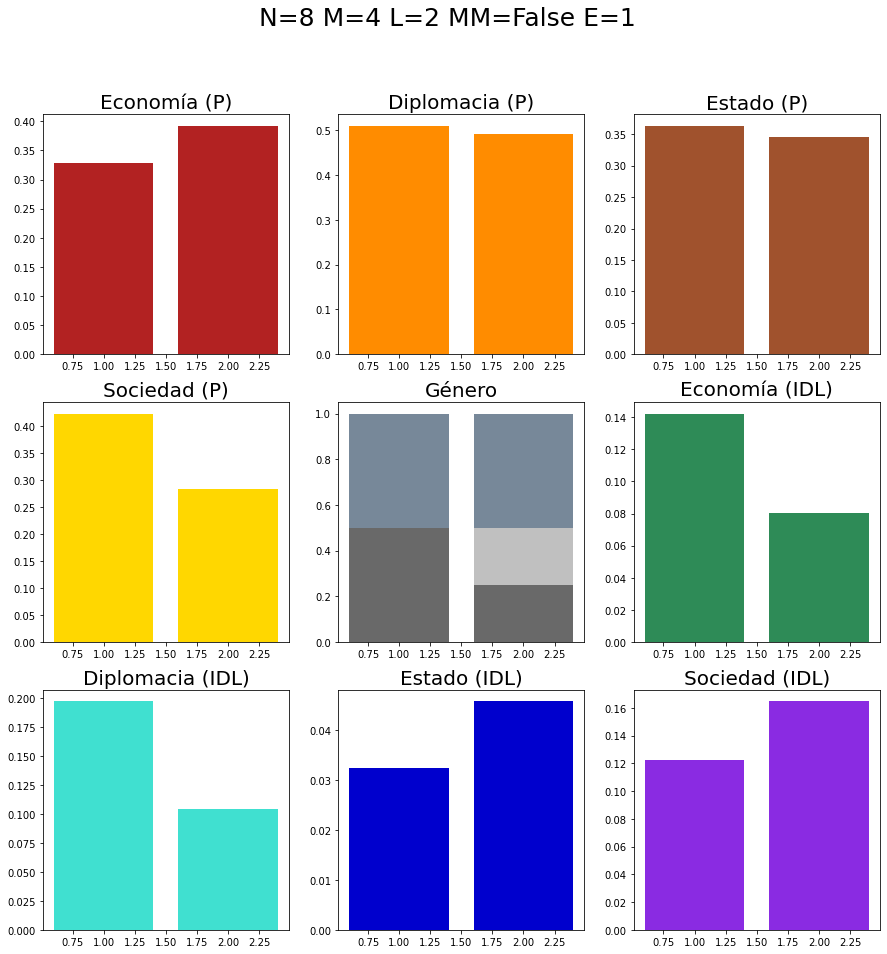

3 3 3 3 3 3 3 3 3 

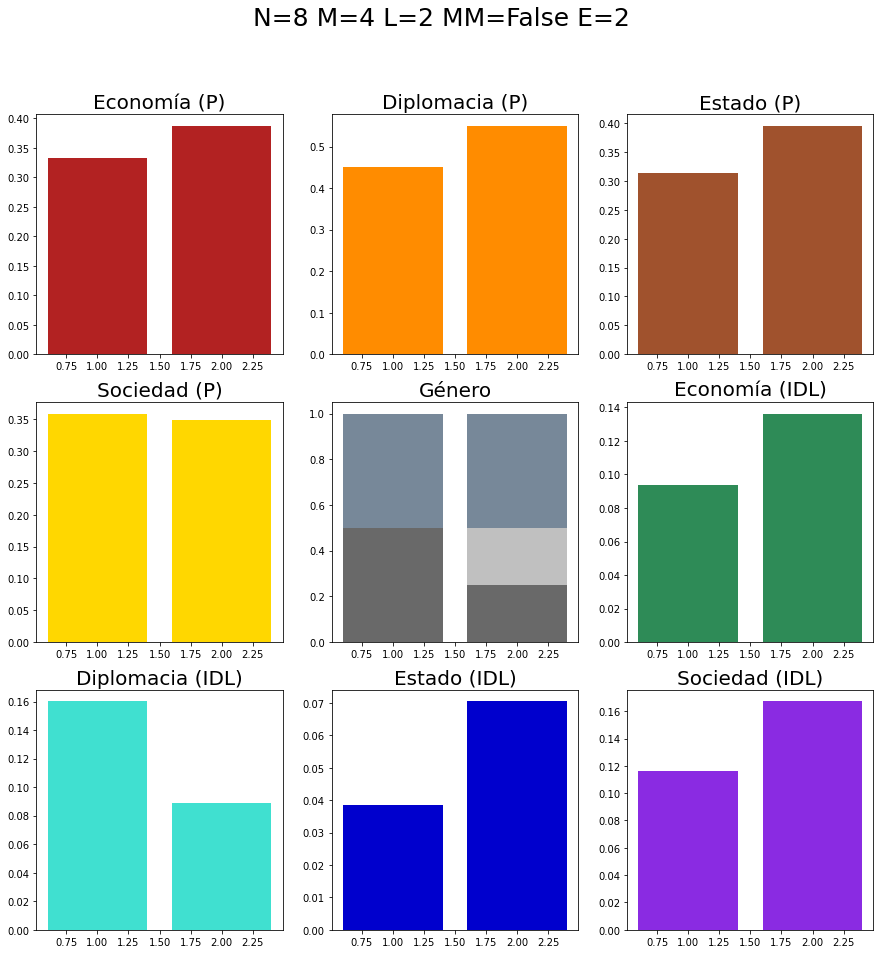

3 3 3 3 3 3 3 3 3 

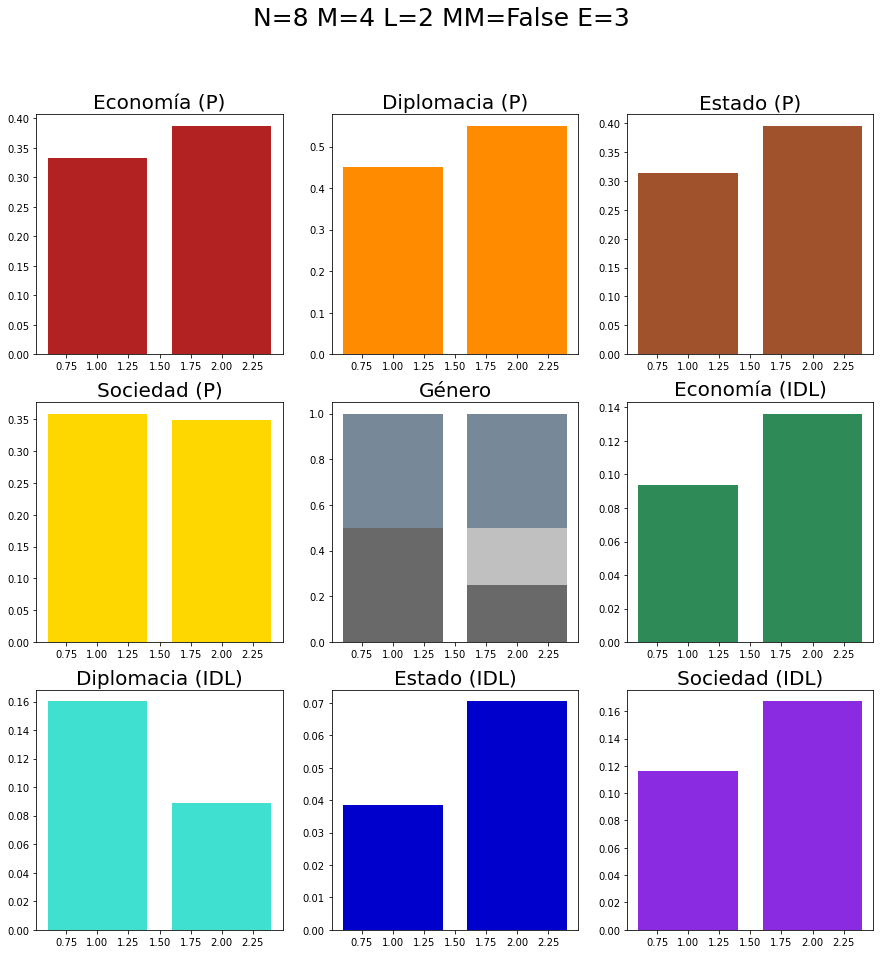

3 3 3 3 3 3 3 3 3 

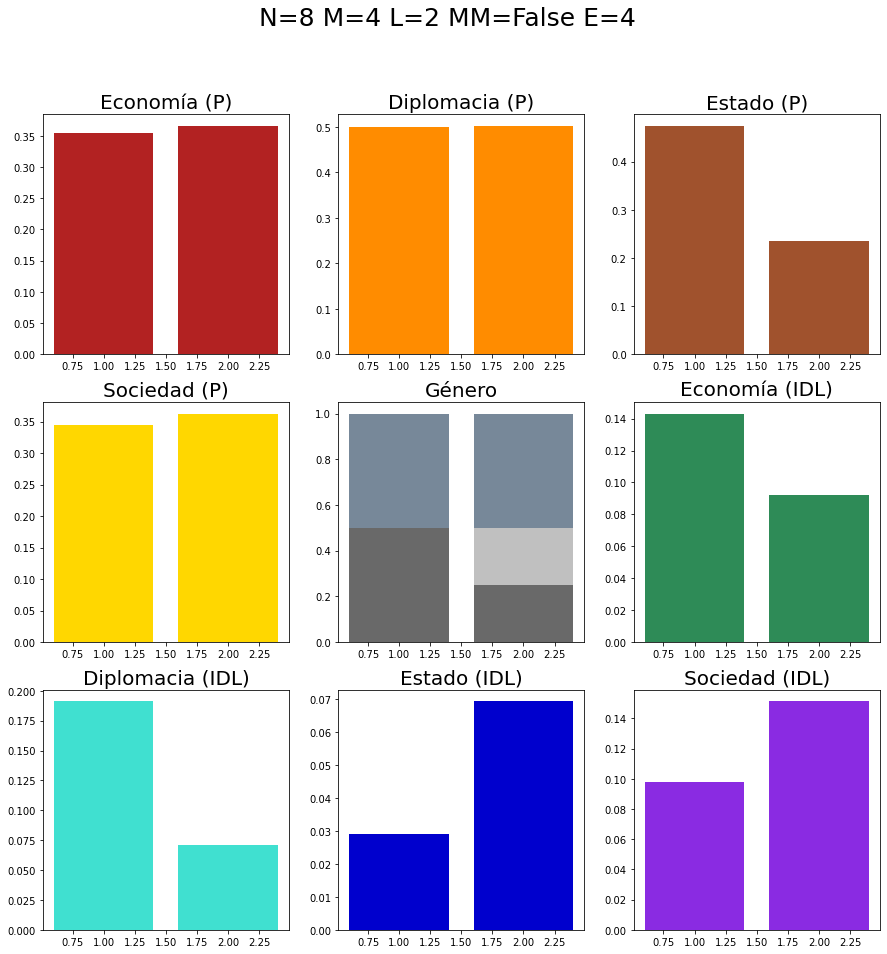

3 3 3 3 3 3 3 3 3 

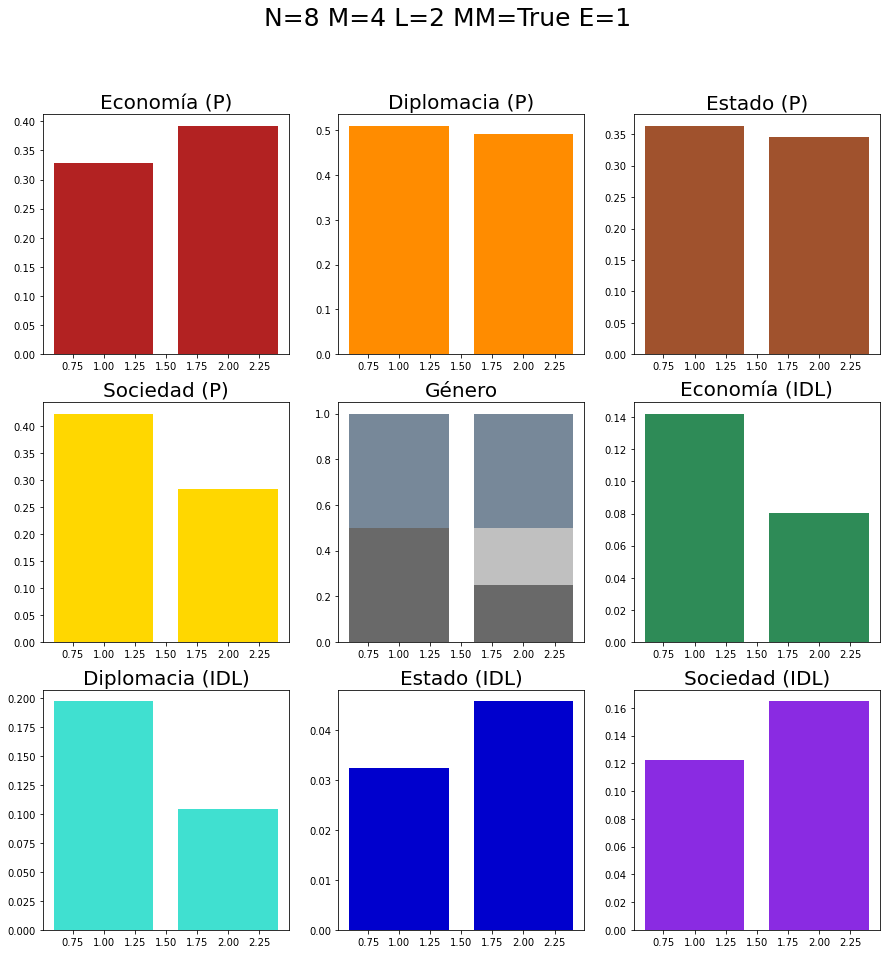

3 3 3 3 3 3 3 3 3 

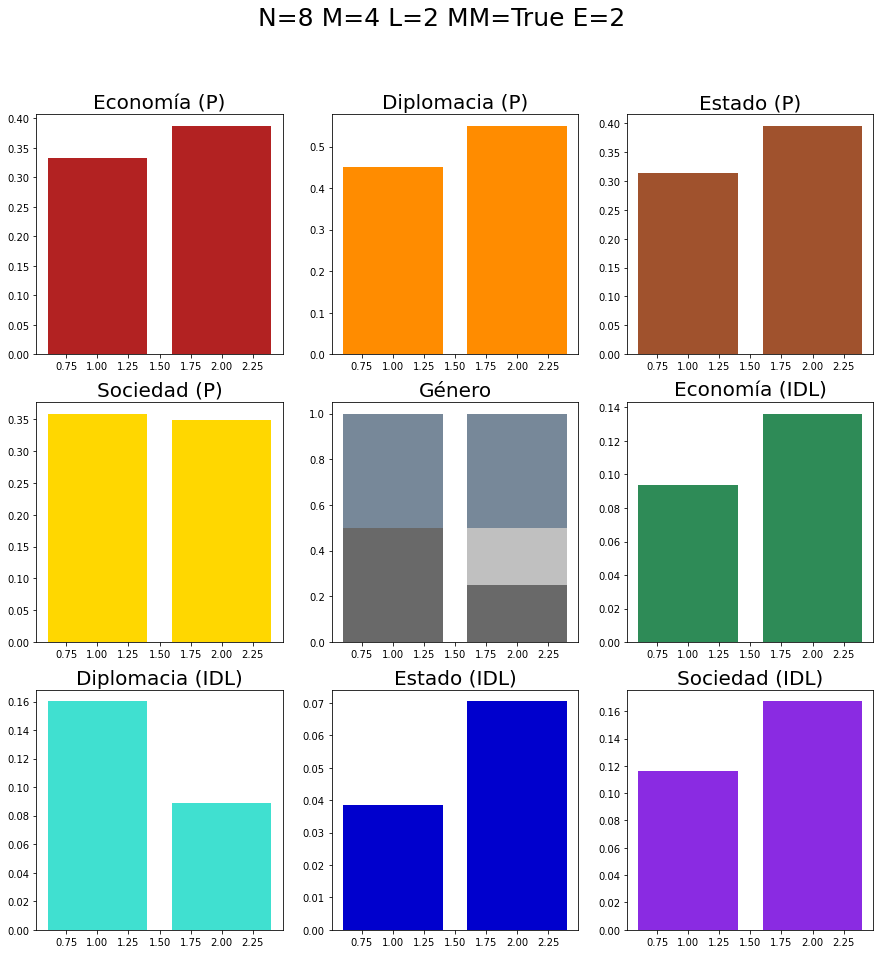

3 3 3 3 3 3 3 3 3 

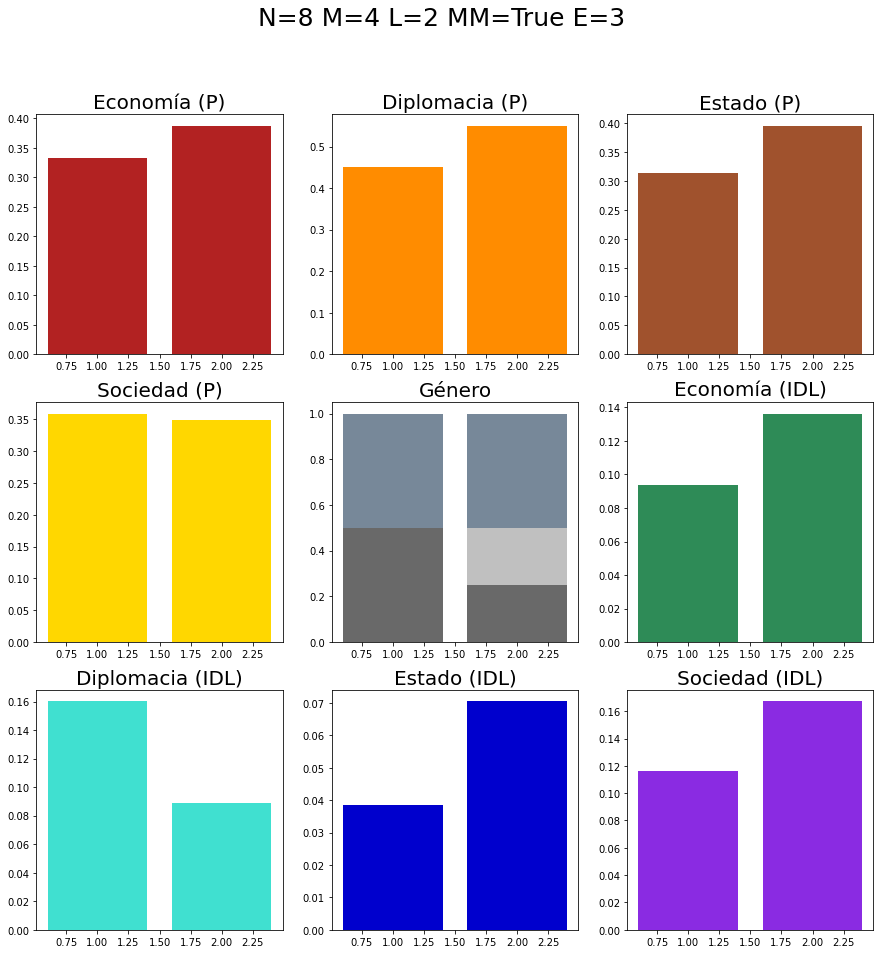

3 3 3 3 3 3 3 3 3 

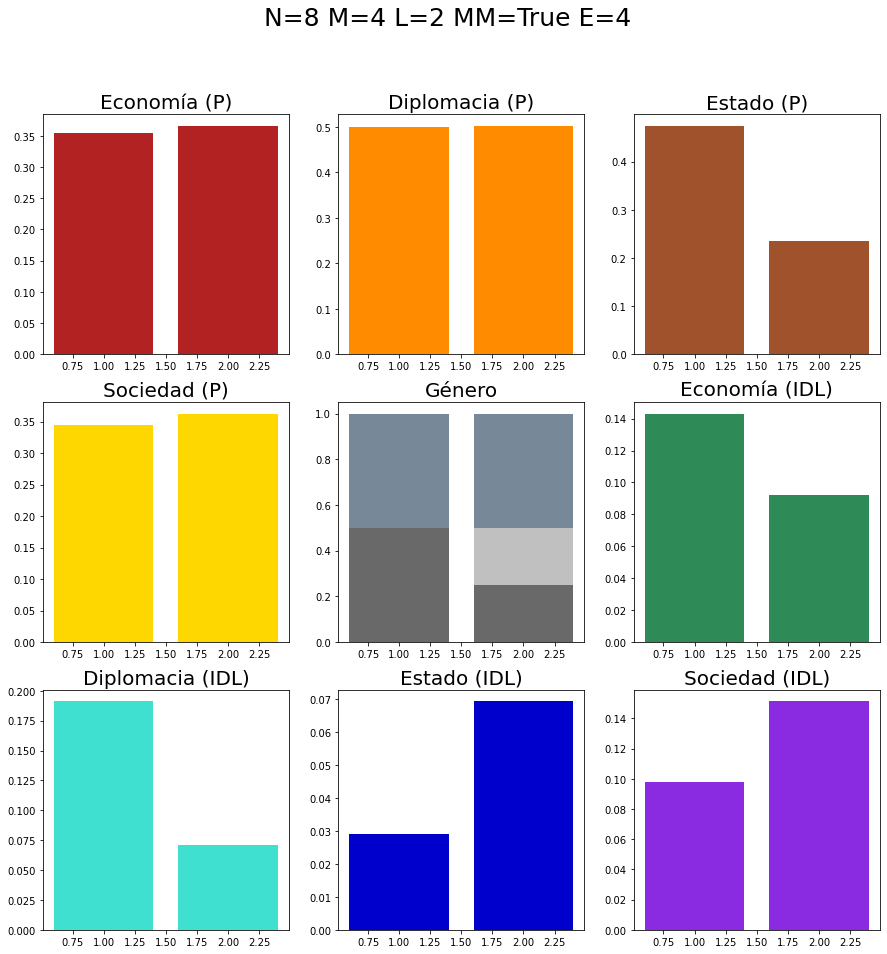

In [32]:
size_grafico = (15, 15)
EJES  = ['economia-p', 'diplomacia-p', 'estado-p', 'sociedad-p', 'genero', 'economia-i', 'diplomacia-i', 'estado-i', 'sociedad-i']
TITLES= ['Economía (P)', 'Diplomacia (P)', 'Estado (P)', 'Sociedad (P)', 'Género', 'Economía (IDL)', 'Diplomacia (IDL)', 'Estado (IDL)', 'Sociedad (IDL)']
bins = 10

for ii in r.index:
    fila = r.loc[ii]
    N, M, L, D, MM, E = fila.N, fila.M, fila.L, fila.Dataset, fila.MinMax, fila.Exp
    sizes = GroupSizes(M, L, N)
    grupos = get_grupos(fila, data.to_numpy())

    colors = ["firebrick", "darkorange", "sienna", "gold", "lightslategrey", "seagreen", "turquoise", "mediumblue", "blueviolet"]
    GENEROS= ["dimgray","silver","lightslategrey"]
    BINS = []
    for i in range(len(EJES)):
        bins = 3 if (EJES[i] == 'genero') else bins
        print(bins, end=" ")
        _, b = np.histogram( data.to_numpy()[:,i], bins=bins )
        BINS.append(b)

    f, axs = plt.subplots( 3, 3, figsize=size_grafico )		
    x = [ i+1 for i in range(L) ]	
    e = 0
    for i in range(3):
        for j in range(3):
            if EJES[e] == "genero":
                fe, m, nb = [], [], []
                for grupo in grupos:
                    # 0		f
                    # 0.5	nb
                    # 1		m
                    #grupo = np.array(sol[l])
                    fe.append( (grupo == 0).sum() / len(grupo) )
                    nb.append( (grupo == 0.5).sum() / len(grupo) )
                    m.append( (grupo == 1).sum() / len(grupo) )
                fe = np.array(fe)
                nb = np.array(nb)
                m = np.array(m)
                axs[i][j].bar( x, fe, color=GENEROS[0], label="F" )
                axs[i][j].bar( x, nb, color=GENEROS[1], bottom=fe, label="NB" )
                axs[i][j].bar( x, m, color=GENEROS[2], bottom=nb+fe, label="M" )
            else:
                y = []
                for grupo in grupos:
                    if "IDL" in TITLES[e]: y.append( np.std(grupo[:,e]) )
                    else: y.append( np.mean(grupo[:,e]) )

                axs[i][j].bar( x, y, color=colors[e] )
                #axs[i][j].axhline( y=g.ObjGenerales[e], ls='--', color="black", lw=3.5, label="Promedio general" )

            axs[i][j].set_title(TITLES[e], size=20)            
            #axs[i][j].legend()       
            e += 1

    f.suptitle( "N={} M={} L={} MM={} E={}".format(N, M, L, MM, E), fontsize=25 )
    plt.savefig("N={} M={} L={} MM={} E={}".format(N, M, L, MM, E))
    plt.show()
